This Notebook demostrate decision trees algorithm solving Regrssion and Classification problems. Using Boston housing and Iris datasets.

In [0]:
#Importing necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeClassifier    # Import decision tree classifier model

In [19]:
boston = load_boston()  # loading dataset
bos = pd.DataFrame(boston.data) #converting into dataframe
bos.columns=boston.feature_names #creating columns in dataframe
bos['PRICE'] = boston.target # creating target variable
print(bos.head()) # checking first 5 rows

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]


In [0]:
print(bos.describe()) # Checking summary statistics of the numerical features.

             CRIM          ZN       INDUS  ...           B       LSTAT       PRICE
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]


Most important features are LSTAT AND RM. Which are related to neighbour hood of the house and Rooms present in the house. Which is Intitutive. 

In [20]:
bos.corr()['PRICE'] # Checking Correaltion between target variable and other features.

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

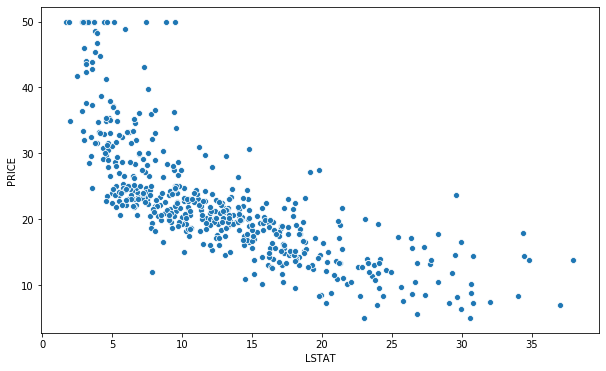

In [21]:
fig = plt.figure(figsize = (10,6))
sns.scatterplot(x = 'LSTAT', y ='PRICE' , data = bos) # Graph shows a neagative correlation between 2 variables.

Fitting Decision tree regressor.

In [0]:
X = bos.drop('PRICE', axis=1)                   # Assign matrix X
y = bos['PRICE']                             # Assign vector y

tree = DecisionTreeRegressor(criterion='mse', max_depth=3)  # Initialize and fit regressor       

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17) # Splitting the data 

tree.fit(X_train,y_train) #fitting the model

y_pred = tree.predict(X_test) # predicting in the holdout set/

In [29]:
score = tree.score(X_test, y_test, sample_weight=None)
print("Accuracy of the model is ",score*100,'%')

Accuracy of the model is  60.32848768168899 %


**Decision Tree Classifier**  **using Iris dataset.**

In [0]:
iris = datasets.load_iris()                        # Load iris dataset
X = iris.data[:, [2, 3]]                           # Assign matrix X using only column 2 and 3 (Petal length and width)
y = iris.target  

In [0]:
flowers = pd.DataFrame(iris.data) #converting into dataframe
flowers.columns=iris.feature_names #creating columns in dataframe
flowers['species'] = iris.target

Using Pair plot, showing relations between all the variables.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


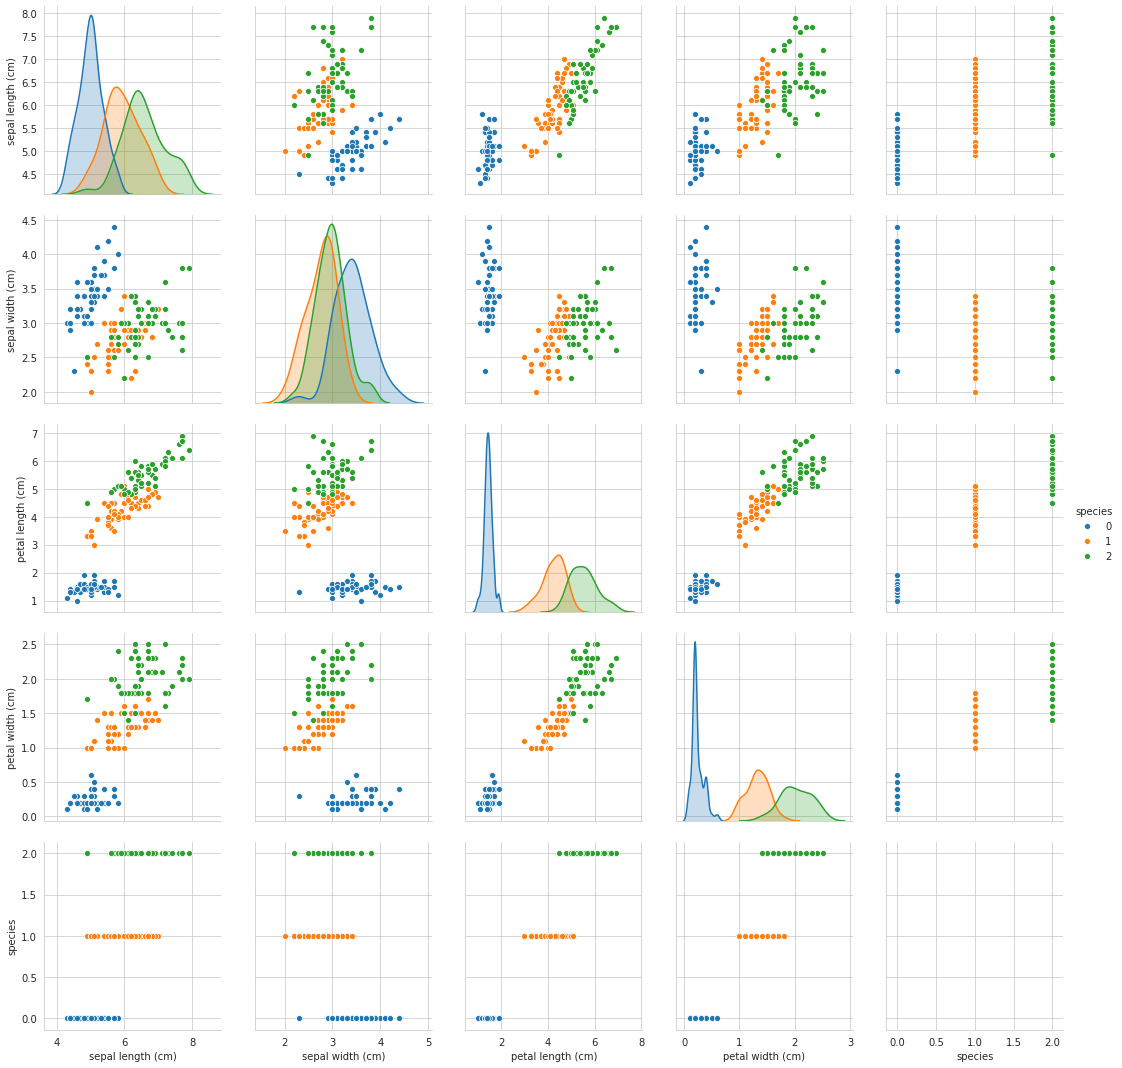

In [38]:
#Plotting a pair plot.
sns.set_style('whitegrid');
sns.pairplot(flowers, hue='species', size=3);
plt.show()

In [39]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=1) # Initialize and fit classifier
tree.fit(X,y) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

Installing necessary libraries, We need graphviz to visulaize the trees made by the model.

In [40]:
!pip3 install pydotplus
!apt install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [41]:
from pydotplus.graphviz import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(                           # Create dot data
    tree, filled=True, rounded=True,
    class_names=['Setosa', 'Versicolor','Virginica'],
    feature_names=['petal length', 'petal width'],
    out_file=None
)

graph = graph_from_dot_data(dot_data)                 # Create graph from dot data
graph.write_png('tree.png') 

True

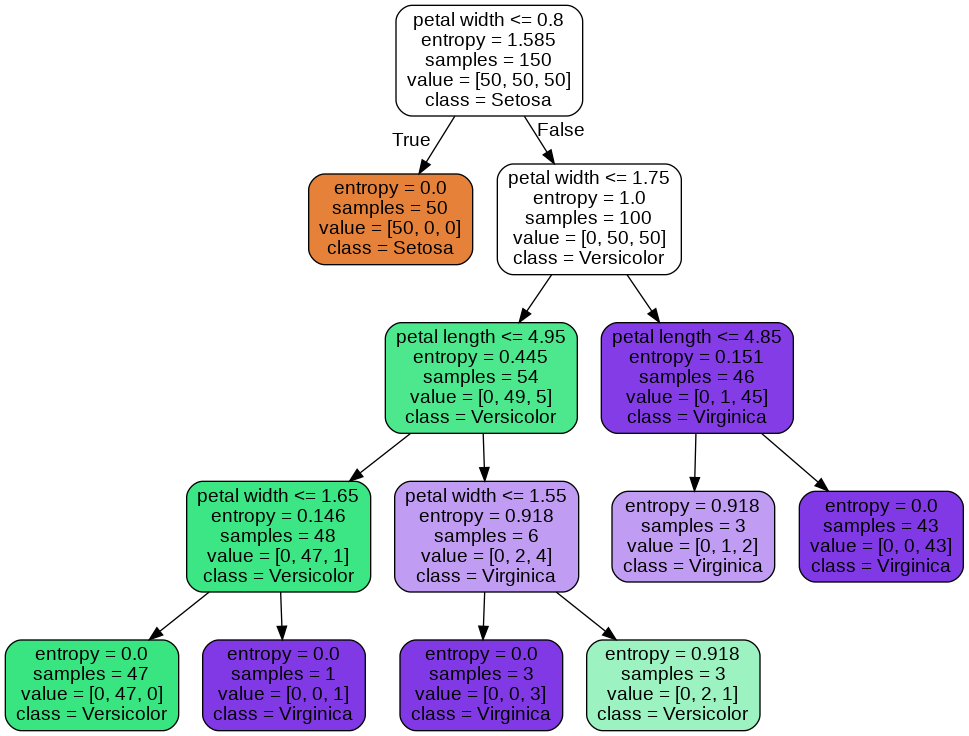

In [42]:
from IPython.display import Image
Image(filename='tree.png')

Conclusion: We Implemented Decision tree regressor with accuracy 60.32848768168899% and classifier and visualized the decision tree classifier usinhg graphviz.